#### **Install Packages**

In [ ]:
!pip install torch
!pip install torch-geometric
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-<YOUR-TORCH-VERSION>+cpu.html
!pip install torch torchvision torchaudio torch_geometric
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 19.4 MB/s eta 0:00:00
/bin/bash: line 1: YOUR-TORCH-VERSION: No such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.5 MB/s eta 0:00:00


In [ ]:
# Import python packages
import torch                                                             # For PyTorch-based computations
from torch_geometric.data import Data                                    # For creating graph data objects in PyTorch Geometric
from torch_geometric.utils import to_undirected                          # Converts directed graphs to undirected graphs
from torch_geometric.utils import from_networkx, subgraph                # Converts NetworkX graphs to PyTorch Geometric format and extracts subgraphs
from torch_geometric.utils import degree                                 # Computes the degree of nodes in a graph
from networkx.algorithms.community import greedy_modularity_communities  # Community detection using greedy modularity maximization
from torch_geometric.data import HeteroData                              # For creating heterogeneous graph data objects
from torch_geometric.utils import to_networkx                            # Converts PyTorch Geometric graphs to NetworkX format
from pyvis.network import Network                                        # For interactive graph visualization
from tqdm import tqdm                                                    # For progress tracking in loops
from sklearn.ensemble import RandomForestClassifier                      # For building a Random Forest classification model
import networkx as nx                                                    # For working with graph data structures
import pickle                                                            # For saving and loading Python objects (e.g., models, data)
import os                                                                # For file and directory operations
import itertools                                                         # For working with iterators and combinations
from itertools import combinations                                       # For generating combinations from an iterable
import random                                                            # For generating random numbers
import pandas as pd                                                      # For data manipulation and analysis
import numpy as np                                                       # For numerical computations
import seaborn as sns                                                    # For data visualization
import matplotlib.pyplot as plt                                          # For creating visualizations
# To ignore warnings
import warnings                                                          # Handles Python warnings
warnings.filterwarnings("ignore")                                        # Suppress all warnings

In [ ]:
# Load the resampled data from CSV
processed_transaction_data = pd.read_csv('/content/drive/MyDrive/processed_transaction_data.csv')

In [ ]:
processed_transaction_data.head()

,V294,V280,V317,V265,V69,V279,V283,V218,C14,V264,...,ProductCD_Volume_S,V40,V5,ProductCD,V33,V225,M3,id_17,TransactionID,isFraud
0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,1.0,0.000000e+00,1.0,0.000000e+00,...,0.0,1.000000,0.874671,0.0,1.000000,0.000000e+00,2.0,2.250000e+02,3230924.0,0.0
1,0.0,0.0,0.0,2.337474e+35,0.000000,0.0,1.0,3.634135e+33,2.0,3.431501e+35,...,0.0,0.000000,1.000000,4.0,0.000000,3.718602e+33,1.0,1.852205e+10,3023634.0,0.0
2,0.0,0.0,0.0,9.696694e+34,0.000000,0.0,1.0,1.507572e+33,2.0,1.423512e+35,...,0.0,0.000000,0.879066,4.0,0.000000,1.542612e+33,2.0,8.589935e+09,3151336.0,0.0
3,0.0,0.0,0.0,9.696694e+34,0.000000,0.0,0.0,1.507572e+33,2.0,1.423512e+35,...,0.0,0.000000,0.878578,4.0,0.000000,1.542612e+33,2.0,5.100274e+09,3210739.0,0.0
4,0.0,0.0,0.0,0.000000e+00,-1.808744,0.0,1.0,0.000000e+00,1.0,0.000000e+00,...,0.0,378.892965,0.874671,2.0,0.574052,0.000000e+00,2.0,1.660000e+02,3020767.0,0.0


#### **Next Steps**

Due to computational efficiency issues with the dataset, i will have to reduce the data size and the number of features in it.

#### **Reducing the dataset using random undersampling**

In [ ]:
# Separate the dataset by class
fraudulent = processed_transaction_data[processed_transaction_data['isFraud'] == 1]
non_fraudulent = processed_transaction_data[processed_transaction_data['isFraud'] == 0]

# Define the target size for each class
target_class_size = 50000

# Randomly sample the target size from each class
fraudulent_sampled = fraudulent.sample(n=target_class_size, random_state=42)
non_fraudulent_sampled = non_fraudulent.sample(n=target_class_size, random_state=42)

# Combine the sampled data
reduced_data = pd.concat([fraudulent_sampled, non_fraudulent_sampled])

# Shuffle the dataset
reduced_data = reduced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify class balance
print(reduced_data['isFraud'].value_counts())

# Save the reduced dataset if needed
reduced_data.to_csv('reduced_balanced_data.csv', index=False)


isFraud
0.0    50000
1.0    50000
Name: count, dtype: int64


#### **Feature importance and Dimensionality Reduction using Tree-Based Classifier**

In [ ]:
# Define features (X) and target (y)
X = reduced_data.drop(columns=['isFraud', 'TransactionID'])  # Exclude the target and ID columns
y = reduced_data['isFraud']  # Target variable

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Compute feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display all features and their importances
print(feature_importances)

    Feature  Importance
2      V317    0.027517
12       C8    0.025414
0      V294    0.024283
41    card6    0.022570
11      V90    0.021387
..      ...         ...
143    V130    0.001057
164     V34    0.000855
199      M3    0.000730
171     V72    0.000514
183     V15    0.000453

[201 rows x 2 columns]


In [ ]:
# Display all the features
pd.set_option('display.max_rows', None)  # Display all rows
print(feature_importances)

                             Feature  Importance
2                               V317    0.027517
12                                C8    0.025414
0                               V294    0.024283
41                             card6    0.022570
11                               V90    0.021387
70                                C4    0.020797
6                               V283    0.019493
166                             V263    0.018682
20                               C13    0.018636
5                               V279    0.018287
27                                C2    0.018124
8                                C14    0.017206
21                              V257    0.017019
1                               V280    0.016415
59                               C10    0.016105
13                              V282    0.015244
19                              V126    0.015115
23                              V232    0.013223
28                               V29    0.013085
15                  

#### **Comparing number of features to be retained for different thresholds of feature importance**.

In [ ]:
# Check retained features for each threshold
thresholds = [0.01, 0.0026, 0.001]

# Calculate retained features count
retained_features = {}
for threshold in thresholds:
    retained_features[threshold] = (feature_importances['Importance'] >= threshold).sum()

# Display retained feature counts
print(retained_features)

{0.01: 27, 0.0026: 97, 0.001: 197}


#### **Retaining features for Graph Construction**

In [ ]:
# Retain features with Importance >= 0.0026
threshold = 0.0026
selected_features = feature_importances[feature_importances['Importance'] >= threshold]['Feature']

# Reduced dataset with selected features and target
graph_data = reduced_data[selected_features.tolist() + ['isFraud','TransactionID']]

print(f"Number of features retained: {len(selected_features)}")

Number of features retained: 97


In [ ]:
# Convert to a list
selected_features_list = selected_features.tolist()

# Print all retained features
print("List of retained features:")
print(selected_features_list)

List of retained features:
['V317', 'C8', 'V294', 'card6', 'V90', 'C4', 'V283', 'V263', 'C13', 'V279', 'C2', 'C14', 'V257', 'V280', 'C10', 'V282', 'V126', 'V232', 'V29', 'V308', 'V97', 'C1', 'D3', 'V217', 'V95', 'D1_High', 'C11', 'V33', 'V128', 'C7', 'V306', 'V288', 'V178', 'D2', 'C6', 'V167', 'V30', 'V69', 'C8_agg_mean', 'C4_agg_sum', 'V289', 'V202', 'C12', 'C4_agg_mean', 'V70', 'V91', 'V287', 'D5', 'D1', 'V292', 'V312', 'V74', 'M4', 'V285', 'V314', 'V315', 'TransactionAmt', 'Time_Diff_Between_Transactions', 'V307', 'V291', 'ProductCD_Volume_C', 'C7_agg_sum', 'V96', 'C7_agg_mean', 'C8_agg_sum', 'C10_agg_mean', 'M5', 'V171', 'V258', 'V48', 'P_emaildomain', 'ProductCD_Volume_R', 'TransactionAmt_Per_Hour', 'C12_agg_mean', 'V303', 'card2', 'V313', 'V218', 'V100', 'LogTransactionAmt', 'C3_agg_sum', 'TransactionAmt_Mean', 'card5', 'V201', 'V52', 'TransactionDT', 'V231', 'V131', 'ProductCD', 'TransactionAmt_Zscore', 'Email_Card_Shared', 'V222', 'V204', 'card1', 'V200', 'C10_agg_sum', 'id_38'

#### **Feature Engingineering "Transaction time features" with TransactionDT for use in Temporal Graph construction**.

In [ ]:
import datetime as dt

# Define the start date as a reference point
START_DATE = '2017-12-01'
start_date = pd.to_datetime(START_DATE)

# Create time-based features directly
graph_data['Weekday'] = (start_date + pd.to_timedelta(graph_data['TransactionDT'], unit='s')).dt.dayofweek
graph_data['Day'] = (start_date + pd.to_timedelta(graph_data['TransactionDT'], unit='s')).dt.day
graph_data['Hour'] = (start_date + pd.to_timedelta(graph_data['TransactionDT'], unit='s')).dt.hour

# Display the new columns to confirm
graph_data[['TransactionDT', 'Weekday', 'Day', 'Hour']].head()


,TransactionDT,Weekday,Day,Hour
0,8.581840e+05,6,10,22
1,5.016858e+06,6,28,1
2,9.146254e+06,4,16,20
3,7.772795e+06,2,28,23
4,9.062399e+06,3,15,21


In [ ]:
graph_data.shape

(100000, 102)

#### **Save the data for Graph Construction to Google Drive.**

In [ ]:
# Save graph data to a CSV file

graph_data.to_csv('graph_data.csv', index=False)

In [ ]:
# Save data to google drive folder

graph_data.to_csv('/content/drive/MyDrive/GraphFeatures/graph_data.csv', index=False)

### **GRAPH CONSTRUCTION**
The following graphs will be constructed

1. Node-Centric Graphs
2. Edge-Centric Graphs
3. Stratified Heterogenous Graphs
4. Temporal Graphs

In [ ]:
# Load the resampled data from CSV
graph_data = pd.read_csv('/content/drive/MyDrive/GraphFeatures/graph_data.csv')

#### **Node Construction**

In [ ]:
# Load the processed data
node_data = graph_data.copy()

# Extract Node IDs
# Use TransactionID as the unique identifier for each node
node_ids = node_data['TransactionID']

# Create Node Attributes
# Use all the other features except 'TransactionID' and 'isFraud' as attributes
node_attributes = node_data.drop(columns=['TransactionID', 'isFraud'])

# Create the Graph
# Initialize an empty graph
G = nx.Graph()

# Add Nodes with Attributes
# Iterate over each transaction (row) and add it as a node
for idx, row in node_data.iterrows():
    node_id = row['TransactionID']  # Use TransactionID as the node ID
    attributes = row.drop(['TransactionID', 'isFraud']).to_dict()  # Attributes for the node
    G.add_node(node_id, **attributes)  # Add node with its attributes

# View Node Count
print(f"Total nodes added: {G.number_of_nodes()}")

Total nodes added: 99898


#### **Save Nodes as Pickle file to Google Drive**

In [ ]:
# Define the folder in Google Drive to save the files
save_path = '/content/drive/MyDrive/GraphFeatures'

# Ensure the folder exists
os.makedirs(save_path, exist_ok=True)

# Save nodes and their attributes as pickle file
with open(os.path.join(save_path, 'nodes.pkl'), 'wb') as file:
    pickle.dump(dict(G.nodes(data=True)), file)

#### **Construction of Similarity-Based Edges**

In [ ]:
# Step 1: Use a copy of graph_data
edge_data = graph_data.copy()

# Step 2: Define Similarity Threshold
similarity_threshold = 0.9  # Adjust this threshold as needed

# Step 3: Initialize Edges List
edges = []  # List to store edges

# Step 4: Define Batch Size
batch_size = 1000  # Number of transactions per batch
transactions = edge_data['TransactionID'].tolist()

# Step 5: Define Google Drive Path
save_path = '/content/drive/MyDrive/GraphFeatures'
os.makedirs(save_path, exist_ok=True)  # Ensure the directory exists

# Step 6: Resume from the Last Saved State
# Check for previously saved intermediate files in the specified path
intermediate_files = [f for f in os.listdir(save_path) if f.startswith("edges_intermediate_") and f.endswith(".pkl")]
if intermediate_files:
    # Get the highest batch number processed
    last_batch = max([int(f.split("_")[2].split(".")[0]) for f in intermediate_files])
    print(f"Resuming from batch: {last_batch}")
else:
    last_batch = 0

# Step 7: Process Remaining Batches
for i in range(last_batch + 1, len(transactions), batch_size):
    batch_transactions = transactions[i:i + batch_size]

    # Iterate over pairs within the batch
    for node1, node2 in itertools.combinations(batch_transactions, 2):
        # Extract features for both nodes
        attributes1 = edge_data.loc[edge_data['TransactionID'] == node1].drop(['TransactionID', 'isFraud'], axis=1).values[0]
        attributes2 = edge_data.loc[edge_data['TransactionID'] == node2].drop(['TransactionID', 'isFraud'], axis=1).values[0]

        # Calculate cosine similarity
        cosine_similarity = np.dot(attributes1, attributes2) / (np.linalg.norm(attributes1) * np.linalg.norm(attributes2))

        # Add edge if similarity exceeds the threshold
        if cosine_similarity > similarity_threshold:
            edges.append((node1, node2))

    # Save intermediate results as pickle in Google Drive
    intermediate_file = os.path.join(save_path, f"edges_intermediate_{i}.pkl")
    with open(intermediate_file, "wb") as f:
        pickle.dump(edges, f)
    print(f"Saved intermediate edges to {intermediate_file}")

# Step 8: Combine Intermediate Files
# Load all intermediate pickle files from Google Drive and combine them
final_edges = []
for file in intermediate_files:
    file_path = os.path.join(save_path, file)
    with open(file_path, "rb") as f:
        final_edges.extend(pickle.load(f))

# Add the latest edges processed in memory
final_edges.extend(edges)

# Remove duplicate edges
final_edges = list(set(final_edges))

# Save the combined edges as a pickle file in Google Drive
final_file = os.path.join(save_path, "edges.pkl")
with open(final_file, "wb") as f:
    pickle.dump(final_edges, f)

print(f"Total edges created: {len(final_edges)}")
print(f"Final edges saved to {final_file}")


Resuming from batch: 25001
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_25002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_26002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_27002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_28002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_29002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_30002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_31002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_32002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_33002.pkl
Saved intermediate edges to /content/drive/MyDrive/GraphFeatures/edges_intermediate_34002.pkl
Saved intermediate edges to /cont

#### **Load saved Nodes and Edge**

In [ ]:
# Load nodes
with open('/content/drive/MyDrive/GraphFeatures/nodes.pkl', 'rb') as f:
    nodes = pickle.load(f)

# Load similarity-based edges
with open('/content/drive/MyDrive/GraphFeatures/edges.pkl', 'rb') as f:
    edges = pickle.load(f)

# Load predefined edges
predefined_edges_path = '/content/drive/MyDrive/GraphFeatures/final_edges.pkl'
with open(predefined_edges_path, 'rb') as f:
    predefined_edges = pickle.load(f)

print("Nodes, similarity-based edges and predefined edges loaded successfully!")
print(f"Loaded predefined edges: {len(predefined_edges)}")

Nodes, similarity-based edges and predefined edges loaded successfully!
Loaded predefined edges: 271128975


### **Node-Centric Graph Construction**

In [ ]:
# Define the file path for the saved graph
nc_graph_file_path = '/content/drive/MyDrive/GraphFeatures/NodeCentricGraph.pkl'

# Load the graph from the pickle file
with open(nc_graph_file_path, 'rb') as f:
    G = pickle.load(f)

In [ ]:
# Initialize a graph
G = nx.Graph()

# Add nodes with attributes
for _, row in node_data.iterrows():
    node_id = row['TransactionID']
    attributes = row.drop(['TransactionID', 'isFraud']).to_dict()
    G.add_node(node_id, **attributes)

# Add edges
G.add_edges_from(edges)

# Save the graph as a pickle file to Google Drive
nc_graph_file_path = '/content/drive/MyDrive/GraphFeatures/NodeCentricGraph.pkl'
with open(nc_graph_file_path, 'wb') as f:
    pickle.dump(G, f)

#### **Visualize The Node-Centric Graph**

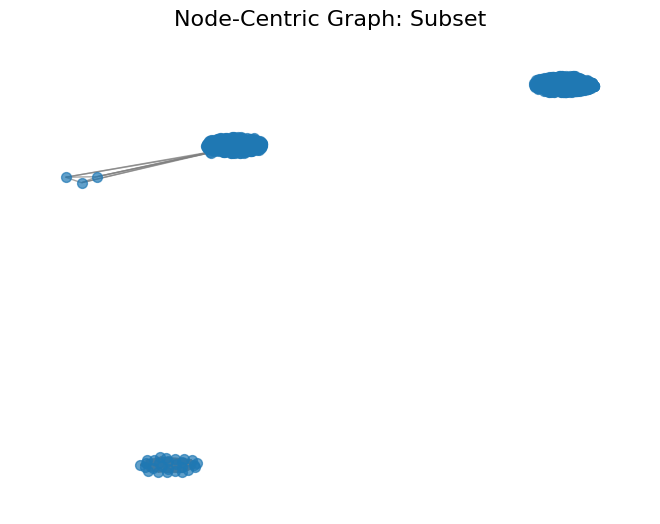

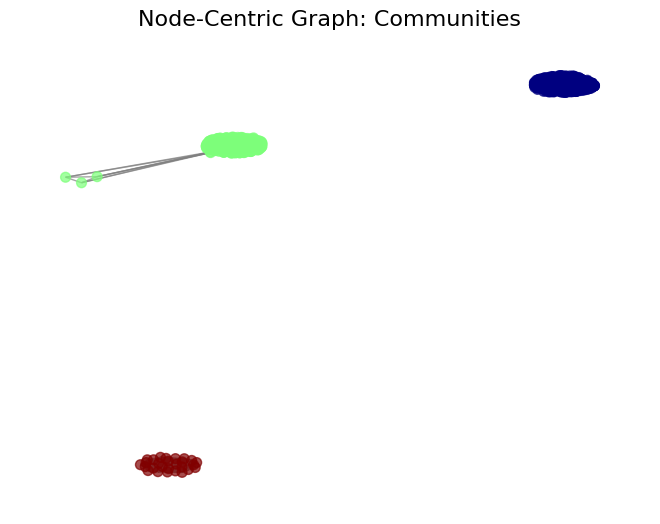

node_centric_graph.html


In [ ]:
# Visualize Node-Centric Graph
def visualize_node_centric_graph(node_centric_graph_path):
    import networkx as nx
    import matplotlib.pyplot as plt
    from pyvis.network import Network
    from networkx.algorithms.community import greedy_modularity_communities

    # Load the node-centric graph
    with open(node_centric_graph_path, 'rb') as f:
        G = pickle.load(f)

    # Convert node IDs to strings to avoid type-related issues
    G = nx.relabel_nodes(G, lambda x: str(x))

    # Filter nodes with high degree
    high_degree_nodes = [node for node, degree in G.degree() if degree > 5]
    subgraph = G.subgraph(high_degree_nodes[:500])  # Subset of 500 nodes for clarity

    # Improve Layout
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, with_labels=False, node_size=50, edge_color="gray", alpha=0.7)
    plt.title("Node-Centric Graph: Subset", fontsize=16)
    plt.show()

    # Highlight communities
    communities = list(greedy_modularity_communities(subgraph))
    community_colors = {node: i for i, community in enumerate(communities) for node in community}
    node_colors = [community_colors[node] for node in subgraph.nodes]
    nx.draw(subgraph, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray", alpha=0.7, cmap=plt.cm.jet)
    plt.title("Node-Centric Graph: Communities", fontsize=16)
    plt.show()

    # Export interactive visualization
    net = Network(notebook=True)
    net.from_nx(subgraph)
    net.show("node_centric_graph.html")

# Path to the node-centric graph
node_centric_graph_path = '/content/drive/MyDrive/GraphFeatures/NodeCentricGraph.pkl'
visualize_node_centric_graph(node_centric_graph_path)

### **Edge-Centric Graph Construction**

##### **Add Target Labels to Node-Centric Graph**

In [ ]:
# Step 1: Load the Node-Centric Graph
node_centric_graph_path = '/content/drive/MyDrive/GraphFeatures/NodeCentricGraph.pkl'
with open(node_centric_graph_path, 'rb') as f:
    G = pickle.load(f)

# Step 2: Load the node_data DataFrame
node_data_path = '/content/drive/MyDrive/GraphFeatures/node_data.pkl'
with open(node_data_path, 'rb') as f:
    node_data = pickle.load(f)

# Step 3: Add Target Labels (isFraud) to Node-Centric Graph
for node in G.nodes:
    # Look up the isFraud label for the node
    is_fraud = node_data.loc[node_data['TransactionID'] == node, 'isFraud']

    # Only add the label if it exists
    if not is_fraud.empty:
        G.nodes[node]['isFraud'] = is_fraud.values[0]

# Step 4: Convert to PyTorch Geometric Data
for node, attr in G.nodes(data=True):
    if isinstance(attr, dict):
        G.nodes[node]['attributes'] = list(attr.values())  # Ensure attributes are lists

node_data_pyg = from_networkx(G, group_node_attrs=['attributes'])
node_data_pyg.y = torch.tensor(
    [attr['isFraud'] for _, attr in G.nodes(data=True)],
    dtype=torch.long
)

##### **Construct Edge-Centric Graph**

In [ ]:
# Step 1: Extract Edges and Features
edge_index = node_data_pyg.edge_index  # Shape: [2, num_edges]
num_edges = edge_index.shape[1]

# Randomly sample a subset of edges for scalability
subset_fraction = 0.05
subset_size = int(subset_fraction * num_edges)
sampled_indices = random.sample(range(num_edges), subset_size)
sampled_edge_index = edge_index[:, sampled_indices]

# Step 2: Create Edge-Centric Features and Labels
edge_features = []
edge_labels = []

for edge_idx in range(sampled_edge_index.shape[1]):
    src, dst = sampled_edge_index[:, edge_idx]
    src_features = node_data_pyg.x[src].tolist()
    dst_features = node_data_pyg.x[dst].tolist()
    edge_features.append(src_features + dst_features)

    # Assign edge label based on source and destination node labels
    src_label = node_data_pyg.y[src].item()
    dst_label = node_data_pyg.y[dst].item()
    edge_labels.append(1 if src_label == 1 or dst_label == 1 else 0)

edge_features = torch.tensor(edge_features, dtype=torch.float)
edge_labels = torch.tensor(edge_labels, dtype=torch.long)

# Step 3: Define Edge-to-Edge Connections
edge_to_edge_connections = []
for edge_idx, (src, dst) in enumerate(sampled_edge_index.t()):
    neighbors = torch.where((sampled_edge_index[0] == src) | (sampled_edge_index[1] == dst))[0]
    edge_to_edge_connections.extend([(edge_idx, nbr.item()) for nbr in neighbors if nbr != edge_idx])

edge_to_edge_index = torch.tensor(edge_to_edge_connections, dtype=torch.long).t()

# Step 4: Create Edge-Centric Graph
edge_centric_data = Data(
    x=edge_features,
    edge_index=edge_to_edge_index,
    y=edge_labels
)

# Step 5: Save Edge-Centric Graph
edge_centric_graph_path = '/content/drive/MyDrive/GraphFeatures/EdgeCentricGraph.pt'
torch.save(edge_centric_data, edge_centric_graph_path)

print(f"Edge-centric graph saved successfully with {edge_centric_data.num_nodes} nodes and {edge_centric_data.num_edges} edges.")

Edge-centric graph saved successfully with 2349356 nodes and 123219806 edges.


#### Visualize a subset of the Edge-Centric Graph

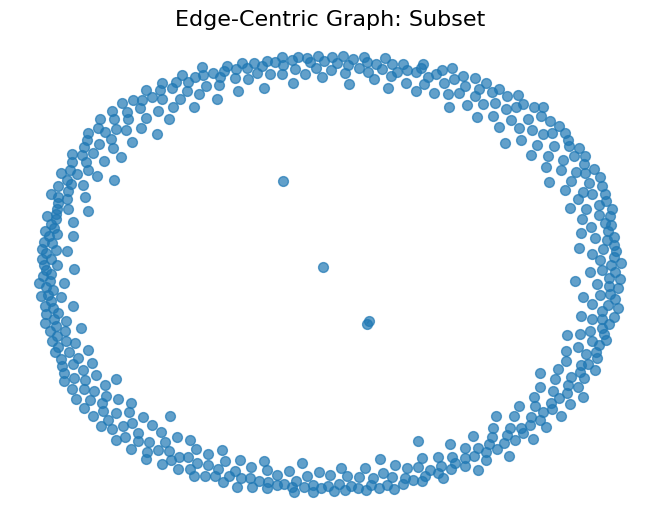

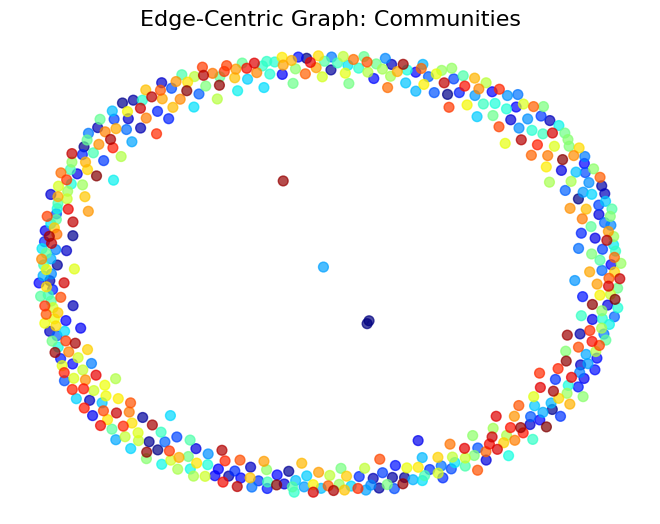

edge_centric_graph.html


In [ ]:
# Visualize Edge-Centric Graph
def visualize_edge_centric_graph(edge_centric_graph_path):
    edge_centric_data = torch.load(edge_centric_graph_path)

    # Convert to NetworkX format
    nx_graph = to_networkx(edge_centric_data, to_undirected=True)

    # Filter nodes with high degree
    high_degree_nodes = [node for node, degree in nx_graph.degree() if degree > 5]
    subgraph = nx_graph.subgraph(high_degree_nodes[:500])  # Limit to 500 for clarity

    # Improve Layout
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, with_labels=False, node_size=50, edge_color="gray", alpha=0.7)
    plt.title("Edge-Centric Graph: Subset", fontsize=16)
    plt.show()

    # Highlight communities
    communities = list(greedy_modularity_communities(subgraph))
    community_colors = {node: i for i, community in enumerate(communities) for node in community}
    node_colors = [community_colors[node] for node in subgraph.nodes]
    nx.draw(subgraph, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray", alpha=0.7, cmap=plt.cm.jet)
    plt.title("Edge-Centric Graph: Communities", fontsize=16)
    plt.show()

    # Export interactive visualization
    net = Network(notebook=True)
    net.from_nx(subgraph)
    net.show("edge_centric_graph.html")

edge_centric_graph_path = '/content/drive/MyDrive/GraphFeatures/EdgeCentricGraph.pt'
visualize_edge_centric_graph(edge_centric_graph_path)

### **Stratified Hetorogenous Construction**

The idea behind stratified sampling based on node connectivity is to ensure that the subset of edges selected for the graph creation reflects the structure of the full graph more accurately.

#### How Stratified Sampling Works
**Group Nodes by Connectivity:**
Divide nodes into bins based on their degree (e.g., low, medium, high connectivity).
**Proportionate Edge Sampling:**
For nodes in each bin, sample edges proportionally to the number of edges within that bin.
**This ensures:**
1.   Nodes with low connectivity retain a higher percentage of their edges.
2.   Nodes with high connectivity retain a lower percentage of their edges.

#### Advantages of Stratified Sampling
**Preserves Graph Structure:**
1.   Prevents over-representation of highly connected nodes.
2.   Ensures that low-connectivity nodes remain part of the graph.




##### **Add target labels to node-centric graph & Construct the Stratified Heterogenous graph**

In [ ]:
# Step 1: Load the Node-Centric Graph
node_centric_graph_path = '/content/drive/MyDrive/GraphFeatures/NodeCentricGraph.pkl'
with open(node_centric_graph_path, 'rb') as f:
    G = pickle.load(f)

# Step 2: Load the node_data DataFrame
node_data_path = '/content/drive/MyDrive/GraphFeatures/node_data.pkl'
with open(node_data_path, 'rb') as f:
    node_data = pickle.load(f)

# Step 3: Add Target Labels (isFraud) to Node-Centric Graph
for node in G.nodes:
    is_fraud = node_data.loc[node_data['TransactionID'] == node, 'isFraud']
    if not is_fraud.empty:
        G.nodes[node]['isFraud'] = is_fraud.values[0]

# Step 4: Convert to PyTorch Geometric Data
for node, attr in G.nodes(data=True):
    if isinstance(attr, dict):
        G.nodes[node]['attributes'] = list(attr.values())  # Ensure attributes are lists

node_data_pyg = from_networkx(G, group_node_attrs=['attributes'])
node_data_pyg.y = torch.tensor(
    [attr['isFraud'] for _, attr in G.nodes(data=True)],
    dtype=torch.long
)

# Validate that the node features and labels are properly assigned
assert node_data_pyg.x is not None, "Node features (x) are missing in the node-centric graph!"
assert node_data_pyg.y is not None, "Target labels (y) are missing in the node-centric graph!"
print(f"Node features shape: {node_data_pyg.x.size()}")
print(f"Target labels shape: {node_data_pyg.y.size()}")

# Step 5: Stratified Sampling of Edges
degrees = degree(node_data_pyg.edge_index[0])  # Get degree of each node

# Binning nodes based on degree
low_connectivity = torch.where(degrees <= 10)[0]
medium_connectivity = torch.where((degrees > 10) & (degrees <= 50))[0]
high_connectivity = torch.where(degrees > 50)[0]

subset_fraction = 0.5  # Use 50% of edges
def sample_edges(edge_index, node_subset, subset_fraction):
    mask = torch.isin(edge_index[0], node_subset) | torch.isin(edge_index[1], node_subset)
    edges = edge_index[:, mask]
    num_sample = int(edges.shape[1] * subset_fraction)
    sampled_indices = torch.randperm(edges.shape[1])[:num_sample]
    return edges[:, sampled_indices]

low_edges = sample_edges(node_data_pyg.edge_index, low_connectivity, subset_fraction)
medium_edges = sample_edges(node_data_pyg.edge_index, medium_connectivity, subset_fraction)
high_edges = sample_edges(node_data_pyg.edge_index, high_connectivity, subset_fraction)

# Combine all edges
final_edge_index = torch.cat([low_edges, medium_edges, high_edges], dim=1)

# Step 6: Batch Processing with Resumption
save_dir = '/content/drive/MyDrive/GraphFeatures/StratifiedHeteroGraph'
os.makedirs(save_dir, exist_ok=True)

batch_save_dir = os.path.join(save_dir, 'batches')
os.makedirs(batch_save_dir, exist_ok=True)

batch_size = 100000
num_batches = (final_edge_index.shape[1] + batch_size - 1) // batch_size

# Check for progress and determine where to resume
processed_batches = [
    int(fname.split('_')[-1].split('.')[0]) for fname in os.listdir(batch_save_dir)
    if fname.startswith("batch_") and fname.endswith(".pt")
]
start_batch = max(processed_batches) + 1 if processed_batches else 0
print(f"Resuming batch processing from batch {start_batch} of {num_batches}.")

# Resume or start batch processing
for batch_idx in range(start_batch, num_batches):
    batch_start = batch_idx * batch_size
    batch_end = min((batch_idx + 1) * batch_size, final_edge_index.shape[1])
    batch_edges = final_edge_index[:, batch_start:batch_end]

    batch_file_path = os.path.join(batch_save_dir, f'batch_{batch_idx}.pt')
    torch.save(batch_edges, batch_file_path)
    print(f"Batch {batch_idx + 1}/{num_batches} saved.")

# Combine all batches into a final edge list
final_edges = []
for batch_file in sorted(os.listdir(batch_save_dir)):
    batch_path = os.path.join(batch_save_dir, batch_file)
    batch_edges = torch.load(batch_path)
    final_edges.append(batch_edges)

final_edge_index = torch.cat(final_edges, dim=1)

# Step 7: Create Heterogeneous Graph
hetero_data = Data(
    x=node_data_pyg.x, edge_index=final_edge_index, y=node_data_pyg.y
)

# Validate the structure of the final graph
assert hetero_data.x is not None, "Node features (x) are missing in the final graph!"
assert hetero_data.edge_index is not None, "Edge index is missing in the final graph!"
assert hetero_data.y is not None, "Target labels (y) are missing in the final graph!"
print(f"Final graph structure: {hetero_data}")
print(f"Node features shape: {hetero_data.x.size()}")
print(f"Edge index shape: {hetero_data.edge_index.size()}")
print(f"Target labels shape: {hetero_data.y.size()}")

# Step 8: Save the Final Graph
final_graph_path = os.path.join(save_dir, "StratifiedHeteronousGraph_AllEdges.pt")
torch.save(hetero_data, final_graph_path)
print(f"Heterogeneous graph saved successfully at {final_graph_path}!")

Node features shape: torch.Size([99898, 101])
Target labels shape: torch.Size([99898])
Resuming batch processing from batch 0 of 236.
Batch 1/236 saved.
Batch 2/236 saved.
Batch 3/236 saved.
Batch 4/236 saved.
Batch 5/236 saved.
Batch 6/236 saved.
Batch 7/236 saved.
Batch 8/236 saved.
Batch 9/236 saved.
Batch 10/236 saved.
Batch 11/236 saved.
Batch 12/236 saved.
Batch 13/236 saved.
Batch 14/236 saved.
Batch 15/236 saved.
Batch 16/236 saved.
Batch 17/236 saved.
Batch 18/236 saved.
Batch 19/236 saved.
Batch 20/236 saved.
Batch 21/236 saved.
Batch 22/236 saved.
Batch 23/236 saved.
Batch 24/236 saved.
Batch 25/236 saved.
Batch 26/236 saved.
Batch 27/236 saved.
Batch 28/236 saved.
Batch 29/236 saved.
Batch 30/236 saved.
Batch 31/236 saved.
Batch 32/236 saved.
Batch 33/236 saved.
Batch 34/236 saved.
Batch 35/236 saved.
Batch 36/236 saved.
Batch 37/236 saved.
Batch 38/236 saved.
Batch 39/236 saved.
Batch 40/236 saved.
Batch 41/236 saved.
Batch 42/236 saved.
Batch 43/236 saved.
Batch 44/236 sa

#### Visualize a subset of the Stratified Heterogenous Graph

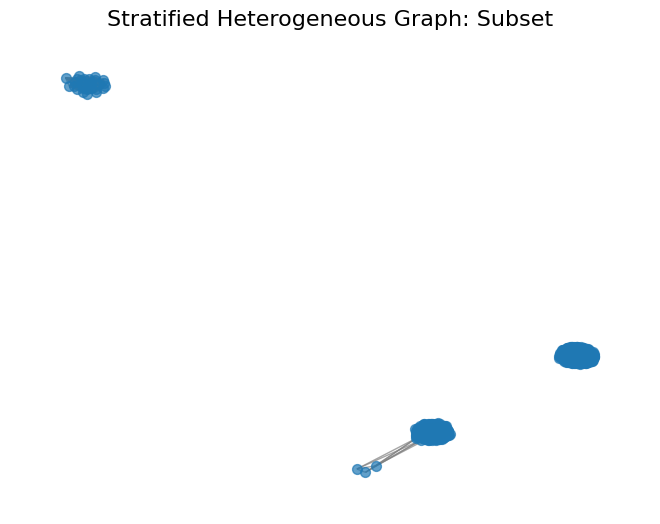

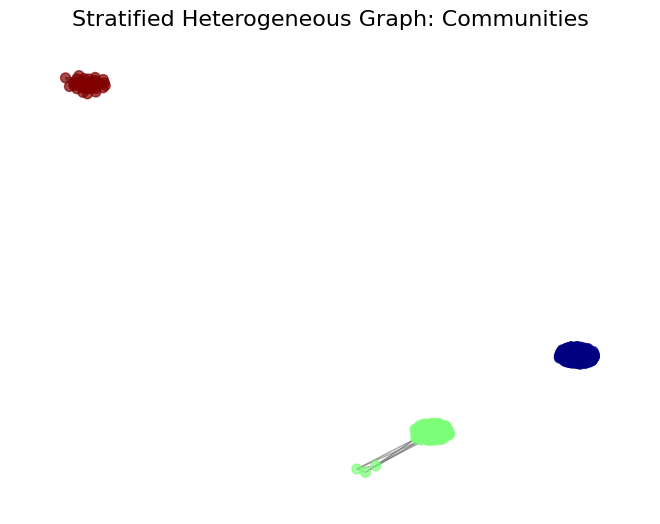

stratified_hetero_graph.html


In [ ]:
# Visualize Stratified Heterogeneous Graph
def visualize_stratified_hetero_graph(stratified_hetero_graph_path):
    stratified_hetero_data = torch.load(stratified_hetero_graph_path)

    # Convert to NetworkX format
    nx_graph = to_networkx(stratified_hetero_data, to_undirected=True)

    # Filter nodes with high degree
    high_degree_nodes = [node for node, degree in nx_graph.degree() if degree > 5]
    subgraph = nx_graph.subgraph(high_degree_nodes[:500])

    # Improve Layout
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, with_labels=False, node_size=50, edge_color="gray", alpha=0.7)
    plt.title("Stratified Heterogeneous Graph: Subset", fontsize=16)
    plt.show()

    # Highlight communities
    communities = list(greedy_modularity_communities(subgraph))
    community_colors = {node: i for i, community in enumerate(communities) for node in community}
    node_colors = [community_colors[node] for node in subgraph.nodes]
    nx.draw(subgraph, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray", alpha=0.7, cmap=plt.cm.jet)
    plt.title("Stratified Heterogeneous Graph: Communities", fontsize=16)
    plt.show()

    # Export interactive visualization
    net = Network(notebook=True)
    net.from_nx(subgraph)
    net.show("stratified_hetero_graph.html")

stratified_hetero_graph_path = '/content/drive/MyDrive/GraphFeatures/StratifiedHeteroGraph/StratifiedHeteronousGraph_AllEdges.pt'
visualize_stratified_hetero_graph(stratified_hetero_graph_path)

### **Temporal Graph Construction**

In [ ]:
# Step 1: Load the processed nodes
node_file_path = '/content/drive/MyDrive/GraphFeatures/nodes.pkl'
with open(node_file_path, 'rb') as file:
    nodes = pickle.load(file)  # Load nodes as a dictionary

# Separate time-related features for edge creation
time_features = ['Weekday', 'Day', 'Hour', 'Time_Diff_Between_Transactions', 'TransactionDT']

# Create a DataFrame for time-related features
node_df = pd.DataFrame.from_dict(nodes, orient='index')
node_df.reset_index(inplace=True)
node_df.rename(columns={'index': 'TransactionID'}, inplace=True)

# Ensure all time-related features are present
assert all(feature in node_df.columns for feature in time_features), "Missing required time-related features."

# Remove time-related features from node attributes
for node_id, attr in nodes.items():
    if isinstance(attr, dict):
        filtered_attributes = {key: value for key, value in attr.items() if key not in time_features}
        nodes[node_id] = {'attributes': list(filtered_attributes.values())}  # Convert attributes to list

# Step 2: Initialize the temporal graph and add nodes
temporal_graph = nx.Graph()
for node_id, attr in nodes.items():
    temporal_graph.add_node(node_id, **attr)

print(f"Added {temporal_graph.number_of_nodes()} nodes to the temporal graph.")

# Step 3: Add edges based on time-related features
# Define thresholds for edge creation
time_threshold = 3600  # Example: 1 hour in seconds

# Process edges in batches for scalability
batch_size = 5000
save_path = '/content/drive/MyDrive/GraphFeatures/TemporalGraphBatches'
os.makedirs(save_path, exist_ok=True)

num_batches = (len(node_df) + batch_size - 1) // batch_size

for batch_idx in range(num_batches):
    print(f"Processing batch {batch_idx + 1}/{num_batches}...")

    batch_start = batch_idx * batch_size
    batch_end = min((batch_idx + 1) * batch_size, len(node_df))
    batch = node_df.iloc[batch_start:batch_end]

    edges = []

    for i, row1 in batch.iterrows():
        for j, row2 in batch.iterrows():
            if i >= j:  # Avoid duplicate or self-edges
                continue

            # Check for temporal relationships
            if abs(row1['TransactionDT'] - row2['TransactionDT']) <= time_threshold:
                edges.append((row1['TransactionID'], row2['TransactionID']))

            if row1['Hour'] == row2['Hour'] and row1['Day'] == row2['Day']:
                edges.append((row1['TransactionID'], row2['TransactionID']))

            if abs(row1['Time_Diff_Between_Transactions'] - row2['Time_Diff_Between_Transactions']) <= time_threshold:
                edges.append((row1['TransactionID'], row2['TransactionID']))

    # Remove duplicate edges
    edges = list(set(edges))

    # Save batch to drive
    batch_file_path = os.path.join(save_path, f"temporal_edges_batch_{batch_idx}.pkl")
    with open(batch_file_path, "wb") as f:
        pickle.dump(edges, f)
    print(f"Saved batch {batch_idx + 1} with {len(edges)} edges.")

# Step 4: Combine all batches into the final edge list
all_edges = []
for batch_file in sorted(os.listdir(save_path)):
    batch_path = os.path.join(save_path, batch_file)
    with open(batch_path, "rb") as f:
        all_edges.extend(pickle.load(f))

# Remove duplicate edges
all_edges = list(set(all_edges))
temporal_graph.add_edges_from(all_edges)

# Step 5: Save the final temporal graph
final_graph_path = '/content/drive/MyDrive/GraphFeatures/TemporalGraph.pkl'
with open(final_graph_path, 'wb') as f:
    pickle.dump(temporal_graph, f)

print(f"Temporal graph saved successfully with {temporal_graph.number_of_nodes()} nodes and {temporal_graph.number_of_edges()} edges.")

Added 99898 nodes to the temporal graph.
Processing batch 1/20...
Saved batch 1 with 2970667 edges.
Processing batch 2/20...
Saved batch 2 with 2975426 edges.
Processing batch 3/20...
Saved batch 3 with 2880827 edges.
Processing batch 4/20...
Saved batch 4 with 2925832 edges.
Processing batch 5/20...
Saved batch 5 with 2965166 edges.
Processing batch 6/20...
Saved batch 6 with 2865590 edges.
Processing batch 7/20...
Saved batch 7 with 2867766 edges.
Processing batch 8/20...
Saved batch 8 with 2929184 edges.
Processing batch 9/20...
Saved batch 9 with 2942725 edges.
Processing batch 10/20...
Saved batch 10 with 2952381 edges.
Processing batch 11/20...
Saved batch 11 with 2854961 edges.
Processing batch 12/20...
Saved batch 12 with 3052173 edges.
Processing batch 13/20...
Saved batch 13 with 3040696 edges.
Processing batch 14/20...
Saved batch 14 with 2800592 edges.
Processing batch 15/20...
Saved batch 15 with 2925367 edges.
Processing batch 16/20...
Saved batch 16 with 2924514 edges.
P

#### Visualization of a subset of the Temporal Graph

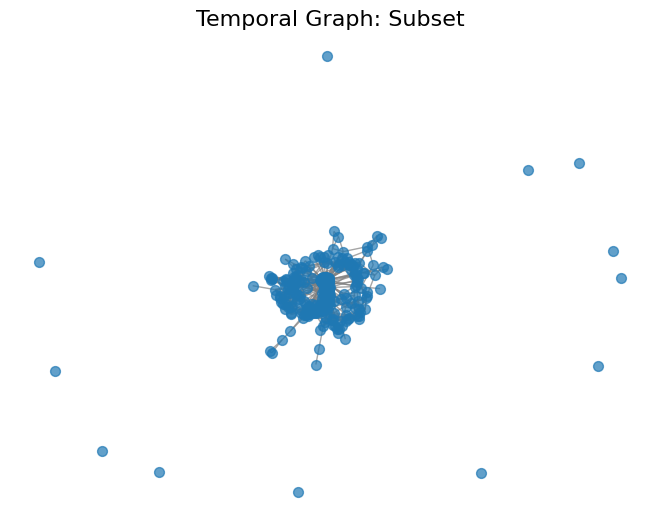

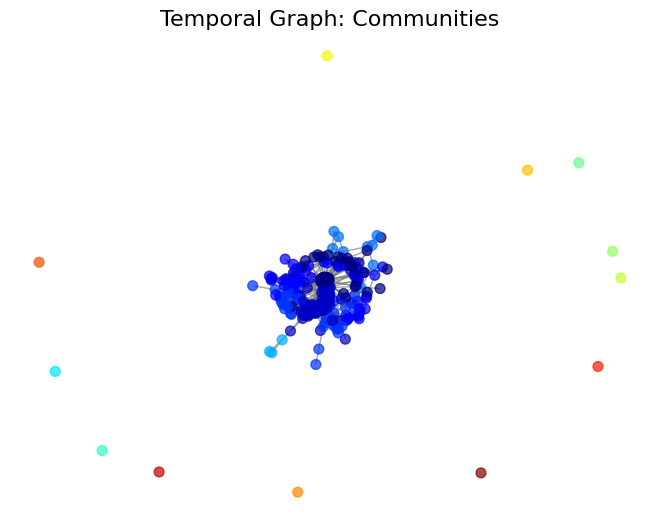

temporal_graph.html


In [ ]:
# Visualize Temporal Graph
def visualize_temporal_graph(temporal_graph_path):
    import networkx as nx
    import matplotlib.pyplot as plt
    from pyvis.network import Network
    from networkx.algorithms.community import greedy_modularity_communities

    with open(temporal_graph_path, 'rb') as f:
        temporal_graph = pickle.load(f)

    # Convert node IDs to strings to avoid type-related issues
    temporal_graph = nx.relabel_nodes(temporal_graph, lambda x: str(x))

    # Filter nodes with high degree
    high_degree_nodes = [node for node, degree in temporal_graph.degree() if degree > 5]
    subgraph = temporal_graph.subgraph(high_degree_nodes[:500])

    # Improve Layout
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, with_labels=False, node_size=50, edge_color="gray", alpha=0.7)
    plt.title("Temporal Graph: Subset", fontsize=16)
    plt.show()

    # Highlight communities
    communities = list(greedy_modularity_communities(subgraph))
    community_colors = {node: i for i, community in enumerate(communities) for node in community}
    node_colors = [community_colors[node] for node in subgraph.nodes]
    nx.draw(subgraph, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray", alpha=0.7, cmap=plt.cm.jet)
    plt.title("Temporal Graph: Communities", fontsize=16)
    plt.show()

    # Export interactive visualization
    net = Network(notebook=True)
    net.from_nx(subgraph)
    net.show("temporal_graph.html")

temporal_graph_path = '/content/drive/MyDrive/GraphFeatures/TemporalGraph.pkl'
visualize_temporal_graph(temporal_graph_path)